In [1]:
import yfinance as yf
import numpy as np

In [4]:
df = yf.download(["AAPL", "CAT"], start = "2000-12-01", end = "2022-10-01")

[*********************100%***********************]  2 of 2 completed


In [6]:
df = np.log(1+df["Adj Close"].pct_change()
)

In [7]:
df

,AAPL,CAT
Date,,
2000-11-30,NaN,NaN
2000-12-01,0.033524,0.034378
2000-12-04,-0.022225,0.062520
2000-12-05,0.018552,0.001442
2000-12-06,-0.172080,-0.042685
...,...,...
2022-09-26,0.002258,-0.009913
2022-09-27,0.006545,-0.001107
2022-09-28,-0.012732,0.032226


In [8]:
weights = [0.5, 0.5]

In [10]:
weights[0]*df.AAPL.mean() + weights[1]*df.CAT.mean()

0.0008191037788671609

In [12]:
def portfolioreturn(weights):
    return np.dot(df.mean(),weights)

In [13]:
portfolioreturn(weights)

0.0008191037788671609

Portfolio Variance

In [34]:
df.cov()

,AAPL,CAT
AAPL,0.000527,0.000183
CAT,0.000183,0.000404


In [35]:
pv = weights[0]**2*df.cov().iloc[0,0] + weights[1]**2*df.cov().iloc[1,1]+2*weights[0]*weights[1]*df.cov().iloc[0,1]

In [36]:
pv

0.0003242815184277694

In [38]:
pv**(1/2)*np.sqrt(250)

0.28472860693464286

In [41]:
def portfoliostd(weights):
    return(np.dot(np.dot(df.cov(),weights),weights))**(1/2)*np.sqrt(250)


In [42]:
portfoliostd(weights)

0.28472860693464286

In [50]:
def weightscreator(df):
    rand = np.random.random(len(df.columns))
    rand /= rand.sum()
    return rand

In [51]:
weightscreator(df)

array([0.50754935, 0.49245065])

In [55]:
returns = []
stds = []
w = []

for i in range(500):
    weights = weightscreator(df)
    returns.append(portfolioreturn(weights))
    stds.append(portfoliostd(weights))
    w.append(weights)

In [58]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Portfolio Return')

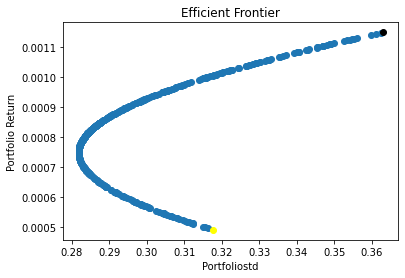

In [63]:
plt.scatter(stds, returns)
plt.scatter(df.std().iloc[0]*np.sqrt(250), df.mean().iloc[0], c="k")
plt.scatter(df.std().iloc[1]*np.sqrt(250), df.mean().iloc[1], c="yellow")
plt.title("Efficient Frontier")
plt.xlabel("Portfoliostd")
plt.ylabel("Portfolio Return")

In [65]:
min(stds)

0.2817660766830897

In [66]:
stds.index(min(stds))

105

In [67]:
returns[stds.index(min(stds))]

0.000746302755154065